# Demo of Ch1. Introduction
----
This is the sample code of TU-ETP-AD1062 Machine Learning Fundamentals.

For more information, please refer to:
https://sites.google.com/view/tu-ad1062-mlfundamentals/

## Import Packages

- `numpy`: Provide linear algebra related computation ability
- `sklearn`: Scikit-Learn, provides basic data analysis and machine learning methods functionality
- `matplotlib`: Provide the functionality of plotting figures, e.g., Histogram, Scatter ., etc.
- `keras.datasets`: Provides common dataset for machine learning playground 

In [1]:
import numpy as np

import sklearn.model_selection
import sklearn.metrics
import sklearn.svm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.datasets import mnist
from keras.datasets import fashion_mnist

%matplotlib inline

Using TensorFlow backend.


## 1. Load MNIST Dataset
The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

For more information, see: http://yann.lecun.com/exdb/mnist/

- Use `X_train.shape` to dump the shape of the MNIST dataset
- Use `numpy.unique` to dump all of possible lables for MNIST dataset

Shape of `X_train`:
(60000, 28, 28)
Labels appeared in `y_train`:
[0 1 2 3 4 5 6 7 8 9]


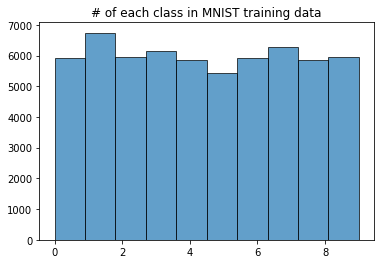

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)

X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

print("Shape of `X_train`:")
print(X_train.shape)

print("Labels appeared in `y_train`:")
print(np.unique(y_train))

plt.hist(y_train, bins=10, edgecolor="black", alpha=0.7)
plt.title("# of each class in MNIST training data")
plt.show()

## 2. Show Images in Dataset

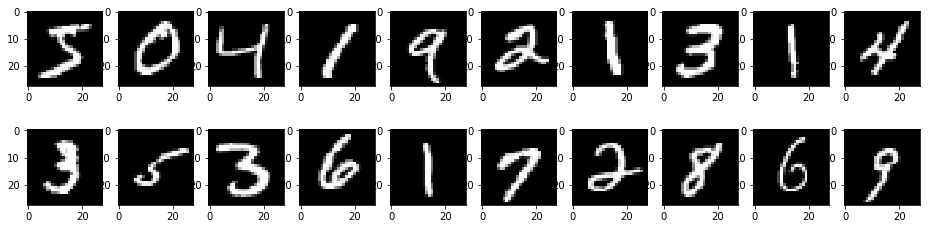

In [3]:
plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i,:], cmap='gray')

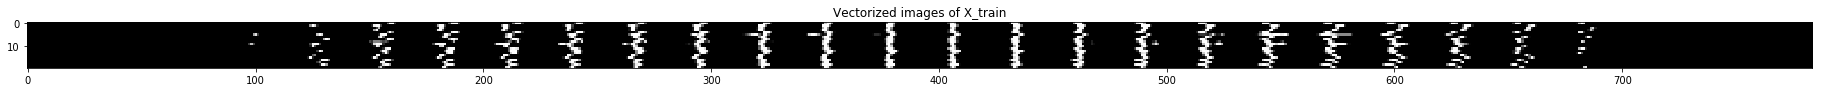

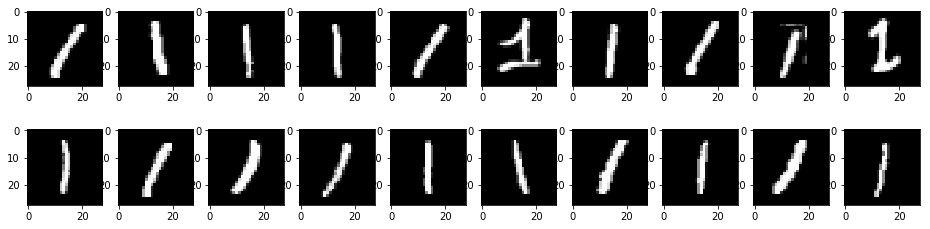

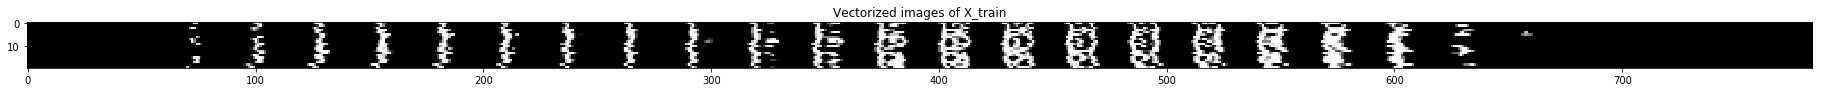

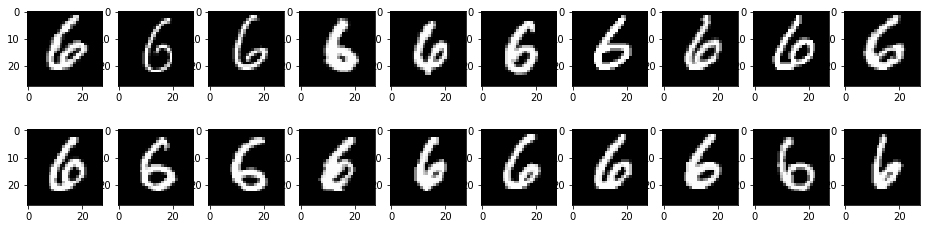

In [8]:
def show_mnist_original_and_vectorized_images(X, n_show=20):
    # Only keeps `n_show` images
    X = X[0:n_show, :, :]
    
    # Image to Vector: Resize from (n_show * 28 * 28) to (n_show * 784)
    X_vec = X.reshape(len(X), 784)
    
    # Show vectorized images
    plt.figure(figsize=(32,16))
    plt.imshow(X_vec, cmap='gray')
    plt.title("Vectorized images of X_train")
    
    # Show original images
    plt.figure(figsize=(16, 4))
    for i in range(0, n_show):
        plt.subplot(((n_show-1) // 10) + 1, 10, i+1)
        plt.imshow(X[i,:], cmap='gray')
        

# MNIST Class label == 1
show_mnist_original_and_vectorized_images(X_train[y_train == 1])

# MNIST class label == 6
show_mnist_original_and_vectorized_images(X_train[y_train == 6])


## 3. Vectorized Original `28 x 28` Images
The original data shape of X_train is `(60000, 28, 28)`, which denotes that there are 60000 images in dimension of `28 x 28`.

To make all images vectorized, using `numpy.reshape`, converted it into shape `(60000, 784)`.

In [4]:
# Vectorized image with shape (784)
X_train_v = X_train.reshape(60000, 784)

# Vectorized image with shape (784), class label == 1
X_train_v_1 = X_train_v[y_train == 1, :]

# Vectorized image with shape (784), class label == 6
X_train_v_6 = X_train_v[y_train == 6, :]

## 4. Vector inner-product
----
This demo shows how to measure the similarity between 2 vectors.

Here we use $\mathbf{w}$, which is a "0"-image as a pseudo-basis vector, and we select following 3 images as pseudo-unknown data:
- `mnist.data[0, :]`, a "0"-image" as a vector $\mathbf{x}_0$
- `mnist.data[10000, :]`, a "1"-image" as a vector $\mathbf{x}_1$
- `mnist.data[15000, :]`, a "2"-image" as a vector $\mathbf{x}_2$

The computation steps:
- Normalize each vector from the range `[0-255]` to the range `[0-1]` first by divded the vector with its own maximum value
- Compute the following inner-products value by `numpy.inner()`:
    - $\mathbf{w}^T\mathbf{x}_0$
    - $\mathbf{w}^T\mathbf{x}_1$
    - $\mathbf{w}^T\mathbf{x}_2$

In [17]:
# Normalize
x1_1 = X_train_v_1[0,:] / np.linalg.norm(X_train_v_1[0,:])
x1_2 = X_train_v_1[1,:] / np.linalg.norm(X_train_v_1[1,:])
x1_3 = X_train_v_1[2,:] / np.linalg.norm(X_train_v_1[2,:])

x6_1 = X_train_v_6[0,:] / np.linalg.norm(X_train_v_1[0,:])
x6_2 = X_train_v_6[1,:] / np.linalg.norm(X_train_v_1[1,:])
x6_3 = X_train_v_6[2,:] / np.linalg.norm(X_train_v_1[2,:])


# Compute the inner products
x1_1_inner_x1_2 = np.inner(x1_1, x1_1)
print (x1_1_inner_x1_2)

x1_1_inner_x6_1 = np.inner(x6_1, x1_3)
print (x1_1_inner_x6_1)

1.0
0.427289745651034


----
----
## IRIS Dataset
----
The IRIS dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

For more information, see: https://archive.ics.uci.edu/ml/datasets/iris

### 1. Load Dataset
- Use `iris.data.shape` to dump the shape of the IRIS dataset
- Use `numpy.unique` to dump all of possible lables for IRIS dataset

In [ ]:
iris = sklearn.datasets.load_iris()

print(iris.data.shape)
print(np.unique(iris.target))

## Demo 1. Vectorized form of the first 10 images in MNIST
----
- Print the first 10 images vector in MNIST in its original form
- Then converted back to visible image form

In [ ]:
print("The 0-th image in vector form:")
plt.figure(figsize=(16, 16))
for i in range(0,10):
    plt.subplot(1, 10, i+1)
    plt.imshow(mnist.data[i,:].reshape((28,28)), cmap='gray')
    
print(mnist.data[0,:])
plt.figure(figsize=(64, 64))
plt.imshow(mnist.data[0,:].reshape(784, 1), cmap='gray')

## Demo 2. Vector inner-product
----
This demo shows how to measure the similarity between 2 vectors.

Here we use $\mathbf{w}$, which is a "0"-image as a pseudo-basis vector, and we select following 3 images as pseudo-unknown data:
- `mnist.data[0, :]`, a "0"-image" as a vector $\mathbf{x}_0$
- `mnist.data[10000, :]`, a "1"-image" as a vector $\mathbf{x}_1$
- `mnist.data[15000, :]`, a "2"-image" as a vector $\mathbf{x}_2$

The computation steps:
- Normalize each vector from the range `[0-255]` to the range `[0-1]` first by divded the vector with its own maximum value
- Compute the following inner-products value by `numpy.inner()`:
    - $\mathbf{w}^T\mathbf{x}_0$
    - $\mathbf{w}^T\mathbf{x}_1$
    - $\mathbf{w}^T\mathbf{x}_2$

In [ ]:
# Bases vector, actually a "0"-image in MNIST
w = mnist.data[0,:]

# Input vector, actually a "0", "1", "2" image in MNIST
x0 = mnist.data[0,:]
x1 = mnist.data[10000,:]
x2 = mnist.data[15000,:]

plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.imshow(x0.reshape((28,28)), cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(x1.reshape((28,28)), cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(x2.reshape((28,28)), cmap='gray')

In [ ]:
# Normalize
w = w/max(w)
x0 = x0/max(x0)
x1 = x1/max(x1)
x2 = x2/max(x2)

# Compute the inner products
wtx0 = np.inner(w, x0)
print (wtx0)

wtx1 = np.inner(w, x1)
print (wtx1)

wtx2 = np.inner(w, x2)
print (wtx2)

## Demo 3. Matrix-Vector Multiplication

- Select 10 images (0-9) from MNIST dataset, form the pseudo-bases matrix: $\mathbf{W} \in \mathbb{R}^{784\times10}$
- Select 1 image (0) from MNIST dataset, form the pseudo-unknown input vector: $\mathbf{x} \in \mathbb{R}^{784\times1}$
- Compute $\mathbf{y} = \mathbf{W}^T\mathbf{x} \in \mathbb{R}^{10\times1}$ to get the similarity between $\mathbf{x}$ and 10 bases vector in $\mathbf{W}$

In [ ]:
idx = [0, 10000, 15000, 20000, 27000, 36000, 41000, 46000, 52000, 69999]

# Show images 0-9
plt.figure(figsize=(16, 16))
for i in range(0, 10):
    plt.subplot(1, 10, i+1)
    plt.imshow(mnist.data[idx[i], :].reshape((28,28)), cmap='gray')

# Compose x
x = mnist.data[1,:]
    
# Compose W
W = np.zeros((28*28, 10))
for i in range(0,10):
    W[:, i] = mnist.data[idx[i], :]
    
# Compute W^T * x
print(W.transpose().dot(x))

## Demo 4. Matrix-Vector Multiplication
----
The demo here shows how to:
1. Decomposes the original 70000 images into **only** 20 bases vectors $W$ (here we use NMF, since images contains no negative value),
2. Then approximates the original image `mnist[0, :]` by bases $W$ and the coefficient vector `h0`

We can say that each element in `h0` denotes the *composition-ratio* of each bases vector `W`


In [ ]:
from sklearn.decomposition import NMF

model = NMF(n_components=20, init='random', random_state=0)
W_ = model.fit_transform(mnist.data.transpose())

In [ ]:
print (W_.shape)
plt.figure(figsize=(16, 4))
for i in range(0, 20):
    plt.subplot(2, 10, i+1)
    plt.imshow(W_[:, i].reshape((28,28)), cmap='gray')
    plt.title("w%d" % (i + 1))

In [ ]:
# Select the coefficient vector of 0-th image
H_ = model.components_
h0 = H_[:, 0]

print("Composition ratio of each bases W:")
print( h0 )

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.imshow(W_.dot( h0 ).reshape((28, 28)), cmap='gray')
plt.title("Reconstructed Image by Matrix-Vector multiplication")

plt.subplot(1, 2, 2)
plt.imshow(mnist.data[0, :].reshape((28, 28)), cmap='gray')
plt.title("Original image")

## Demo 5. Training Set, Validation Set, and Testing Set Separation
----
The demo here shows how to divide the collected labled-data into training set and testing set.
- `sklearn.model_selection.train_test_split` separate data into 30 testing data and 120 training data
- `sklearn.model_selection.cross_val_score` conduct the 5-fold cross-validation with linear SVM


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris.data,      # All Feature vectors (150)
    iris.target,    # All Label (150)
    test_size=0.2,  # Ratio of testing data
    random_state=0  # Random separated or not
)

print("# Training data: %d" % len(y_train))
print("# Testing data: %d" % len(y_test))

plt.figure(2, figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

clf = sklearn.svm.SVC(kernel='linear', C=1)

clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
scores = sklearn.metrics.zero_one_loss(y_test, y_predict)
print("Result of train_test_split:")
print("  Original label of X_test: %s" % y_test)
print("  Predicted label of X_test: %s" % y_predict)
print("  0-1 loss: %s" % scores)
print("")


scores = sklearn.model_selection.cross_val_score(clf, iris.data, iris.target, cv=5)
print("Result of 5-fold cross validation:")
print("  %s" % scores)